### 1.Exploring and Processing the Data

### 2.Building and Training our Neural Network

### 3.Visualizing Loss and Accuracy

### 4.Adding Regularization to our Neural Network

                        STep 1 : Exploring and Processing the Data

In [43]:
import pandas as pd
df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [44]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [45]:
X = dataset[:,0:10]

In [46]:
Y = dataset[:,10]

The next step in our processing is to make sure that the scale of the input features are similar. Right now, features such as lot area are in the order of the thousands, a score for overall quality is ranged from 1 to 10, and the number of fireplaces tend to be 0, 1 or 2.

In [47]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

/home/sands/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Now, we are down to our last step in processing the data, which is to split our dataset into a training set, a validation set and a test set.


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

Unfortunately, this function only helps us split our dataset into two. Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [51]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In summary, we now have a total of six variables for our datasets we will use:
1. X_train (10 input features, 70% of full dataset)
2. X_val (10 input features, 15% of full dataset)
3. X_test (10 input features, 15% of full dataset)
4. Y_train (1 label, 70% of full dataset)
5. Y_val (1 label, 15% of full dataset)
6. Y_test (1 label, 15% of full dataset)

In [52]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


### Building and Training our First Neural Network 

#First Step: Setting up the Architecture
In words, we want to have these layers:
1. Input Layer : 10 neurons
2. Hidden layer 1: 32 neurons, ReLU activation
3. Hidden layer 2: 32 neurons, ReLU activation
4. Output Layer: 1 neuron, Sigmoid activation

Now, we need to describe this architecture to Keras. We will be using the Sequential model, which means that we merely need to describe the layers above in sequence.
First, let’s import the necessary code from Keras:


In [53]:
from keras.models import Sequential
from keras.layers import Dense

In [54]:
## Example : model = Sequential([ ... ])

In [55]:
# Then, we specify that in our Keras sequential model like this:

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

### Dense(32, activation='relu', input_shape=(10,)), 
We have our first layer as a dense layer with 32 neurons, ReLU activation and the input shape is 10 since we have 10 input features. Note that ‘Dense’ refers to a fully-connected layer, which is what we will be using.


Our second layer is also a dense layer with 32 neurons, ReLU activation. Note that we do not have to describe the input shape since Keras can infer from the output of our first layer.

### Dense(1, activation='sigmoid'),

Our third layer is a dense layer with 1 neuron, sigmoid activation.
And just like that, we have written our model architecture (template) in code!

   ### STEP 2: Second Step: Filling in the best numbers

Now that we’ve got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
1. Telling it which algorithm you want to use to do the optimization
2. Telling it what loss function to use
3. Telling it what other metrics you want to track apart from the loss function
Configuring the model with these settings requires us to call the function model.compile, like this:

In [56]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [57]:
#Training on the data is pretty straightforward and requires us to write one line of code:

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 321us/step - loss: 0.6707 - acc: 0.7114 - val_loss: 0.6637 - val_acc: 0.7397
Epoch 2/100
1022/1022 [==============================] - 0s 58us/step - loss: 0.6620 - acc: 0.7211 - val_loss: 0.6534 - val_acc: 0.7671
Epoch 3/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.6528 - acc: 0.7632 - val_loss: 0.6419 - val_acc: 0.7808
Epoch 4/100
1022/1022 [==============================] - 0s 45us/step - loss: 0.6431 - acc: 0.7710 - val_loss: 0.6315 - val_acc: 0.7717
Epoch 5/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.6339 - acc: 0.7368 - val_loss: 0.6247 - val_acc: 0.8219
Epoch 6/100
1022/1022 [==============================] - 0s 44us/step - loss: 0.6253 - acc: 0.8014 - val_loss: 0.6160 - val_acc: 0.8402
Epoch 7/100
1022/1022 [==============================] - 0s 56us/step - loss: 0.6161 - acc: 0.8239 - val_loss: 0.6062 - val_acc: 0.8402


1022/1022 [==============================] - 0s 49us/step - loss: 0.3029 - acc: 0.8796 - val_loss: 0.2933 - val_acc: 0.8813
Epoch 61/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.3017 - acc: 0.8816 - val_loss: 0.2936 - val_acc: 0.8904
Epoch 62/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.3006 - acc: 0.8806 - val_loss: 0.2909 - val_acc: 0.8813
Epoch 63/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.2995 - acc: 0.8826 - val_loss: 0.2883 - val_acc: 0.8721
Epoch 64/100
1022/1022 [==============================] - 0s 42us/step - loss: 0.2980 - acc: 0.8816 - val_loss: 0.2908 - val_acc: 0.8858
Epoch 65/100
1022/1022 [==============================] - 0s 49us/step - loss: 0.2966 - acc: 0.8836 - val_loss: 0.2845 - val_acc: 0.8813
Epoch 66/100
1022/1022 [==============================] - 0s 43us/step - loss: 0.2966 - acc: 0.8826 - val_loss: 0.2846 - val_acc: 0.8813
Epoch 67/100
1022/1022 [==============================

In [58]:
#To find the accuracy on our test set, we run this code below
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 24us/step


0.881278536907614

The reason why we have the index 1 after the model.evaluate function is because the function returns the loss as the first element and the accuracy as the second element. To only output the accuracy, simply access the second element (which is indexed by 1, since the first element starts its indexing from 0).


#### Summary: Coding up our first neural network required only a few lines of code:
1. We specify the architecture with the Keras Sequential model.
2. We specify some of our settings (optimizer, loss function, metrics to track) with model.compile
3. We train our model (find the best parameters for our architecture) with the training data with model.fit
4. We evaluate our model on the test set with model.evaluate

   ### Visualizing Loss and Accuracy

In [61]:
import matplotlib.pyplot as plt

Then, we want to visualize the training loss and the validation loss. To do so, run this snippet of code:

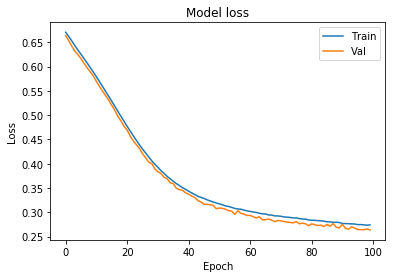

In [62]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We can do the same to plot our training accuracy and validation accuracy with the code below:

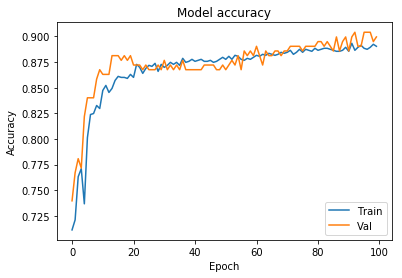

In [63]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Adding Regularization to our Neural Network

In [64]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])


model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 3ms/step - loss: 0.4514 - acc: 0.7886 - val_loss: 0.3404 - val_acc: 0.8584
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3425 - acc: 0.8571 - val_loss: 0.3099 - val_acc: 0.8630
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.3031 - acc: 0.8689 - val_loss: 0.3010 - val_acc: 0.8676
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2760 - acc: 0.8953 - val_loss: 0.2615 - val_acc: 0.8858
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2711 - acc: 0.8845 - val_loss: 0.2825 - val_acc: 0.8767
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2595 - acc: 0.9031 - val_loss: 0.2633 - val_acc: 0.8721
Epoch 7/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.2614 - acc: 0.8933 - val_loss: 0.4144 - val_acc: 0.8356
Epoch 8/

Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1354 - acc: 0.9403 - val_loss: 0.4378 - val_acc: 0.8767
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1805 - acc: 0.9286 - val_loss: 0.2897 - val_acc: 0.8813
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1469 - acc: 0.9364 - val_loss: 0.2882 - val_acc: 0.8858
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1662 - acc: 0.9286 - val_loss: 0.3059 - val_acc: 0.8584
Epoch 65/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1497 - acc: 0.9364 - val_loss: 0.3191 - val_acc: 0.8950
Epoch 66/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1345 - acc: 0.9472 - val_loss: 0.3412 - val_acc: 0.8767
Epoch 67/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.1513 - acc: 0.9403 - val_loss: 0.3641 - val_acc: 0.8721
Epoch 68/100
1022/1022 [========================

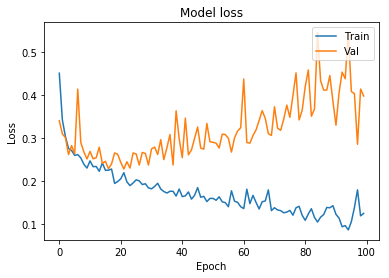

In [65]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

This is a clear sign of over-fitting. The training loss is decreasing, but the validation loss is way above the training loss and increasing 

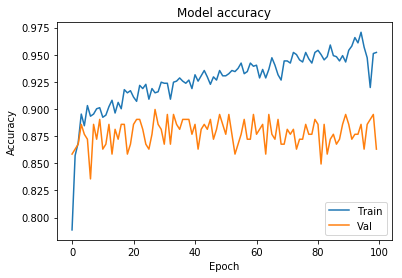

In [66]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Now, let’s try out some of our strategies to reduce over-fitting (apart from changing our architecture back to our first model). that we introduced three strategies to reduce over-fitting.

Of the three, we’ll incorporate L2 regularization and dropout here. The reason we don’t add early stopping here is because after we’ve used the first two strategies, the validation loss doesn’t take the U-shape we see above and so early stopping will not be as effective.

In [67]:
from keras.layers import Dropout
from keras import regularizers

In [68]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Difference 1:
To add L2 regularization, notice that we’ve added a bit of extra code in each of our dense layers like this:
kernel_regularizer=regularizers.l2(0.01)
This tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.


#### Difference 2: 
To add Dropout, we added a new layer like this:
Dropout(0.3),
This means that the neurons in the previous layer has a probability of 0.3 in dropping out during training. Let’s compile it and run it with the same parameters as our Model 2 (the overfitting one):



In [69]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 5s 5ms/step - loss: 14.7182 - acc: 0.6761 - val_loss: 4.1043 - val_acc: 0.7854
Epoch 2/100
1022/1022 [==============================] - 3s 3ms/step - loss: 1.7555 - acc: 0.8288 - val_loss: 0.6611 - val_acc: 0.8813
Epoch 3/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5664 - acc: 0.8552 - val_loss: 0.5189 - val_acc: 0.8767
Epoch 4/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5487 - acc: 0.8542 - val_loss: 0.5226 - val_acc: 0.8767
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4974 - acc: 0.8787 - val_loss: 0.4608 - val_acc: 0.8904
Epoch 6/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4784 - acc: 0.8748 - val_loss: 0.4454 - val_acc: 0.8950
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4806 - acc: 0.8748 - val_loss: 0.4441 - val_acc: 0.9041
Epoch 8

Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4327 - acc: 0.8806 - val_loss: 0.4031 - val_acc: 0.9087
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4299 - acc: 0.8943 - val_loss: 0.4366 - val_acc: 0.8539
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4334 - acc: 0.8924 - val_loss: 0.4050 - val_acc: 0.9041
Epoch 64/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4603 - acc: 0.8659 - val_loss: 0.4198 - val_acc: 0.8995
Epoch 65/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4469 - acc: 0.8787 - val_loss: 0.4084 - val_acc: 0.8950
Epoch 66/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4201 - acc: 0.8924 - val_loss: 0.4029 - val_acc: 0.9178
Epoch 67/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4332 - acc: 0.8816 - val_loss: 0.4016 - val_acc: 0.9087
Epoch 68/100
1022/1022 [========================

And now, let’s plot the loss and accuracy graphs. You’ll notice that the loss is a lot higher at the start, and that’s because we’ve changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting:

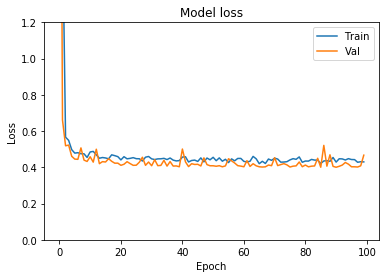

In [70]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

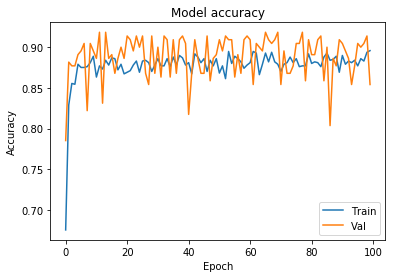

In [71]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Compared to our model in Model 2, we’ve reduced overfitting substantially! And that’s how we apply our regularization techniques to reduce overfitting to the training set.

##### Summary: 
To deal with overfitting, we can code in the following strategies into our model each with about one line of code:
1. L2 Regularization
2. Dropout